##  Objetivos do negócio.

A bolsa de valores de commodities opera num sistema de contratos futuros, no qual os investidores pode apostar no aumento ou queda do preço de matérias primas de forma a vendê-las mais caro depois. O sucesso de um investimento nesse mercado depende da capacidade de um agente economico de conseguir prever a direção que o preço tomará. O objetivo desse trabalho é localizar padrões na flutuação do preço das diferentes commodities presentes e criar um modelo que possa determinar com alguma precisão qual deve ser a próxima ação a se tomar.

### Acess Situation

Esse projeto visa a criação de um workflow utilizando o pacote sci-kit learn. Para a formulação da base de dados será provavelmente necessário o uso de multiplas fontes, e pode pontecialmente envolver metódos de scraping para o recolhimento de dados mais específicos. Se o mercado não tiver muitos padrões de comportamento existe a possibilidade do modelo desenvolvido não ser preciso, o que o tornará obsoleto. Entranto como isso é um trabalho universitário o custo  falha ou do sucesso desse modelo influencia somente a minha nota.

## Data understanding

### Coleta de dados 

Fontes dos dados
https://www.ncdc.noaa.gov/cag/statewide/time-series/47/tavg/all/8/1996-2021?base_prd=true&begbaseyear=1901&endbaseyear=2000
https://www.indexmundi.com/commodities/
https://www.cropprophet.com/us-corn-production-by-state/#2010
https://chaipredict.com/blog-2/2020/1/2-six-factors-affecting-commodity-price-volatility
https://www.westfieldinsurance.com/resources/articles/what-are-the-main-uses-of-corn

A coleta incial dos dados foi realizada anteriormente, conforme a seção acima. Devido ao grande número de variáveis coletadas não faz sentido mostrar o processo de criação da base de dados. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn.preprocessing import MaxAbsScaler
%matplotlib inline
abs_scaler = MaxAbsScaler()


%reload_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv("tab2.csv")
df.dropna(how = "any",inplace = True)
df.head(10)

,Month,Price,Change,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,Ohio,Missouri,Winsconsin,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon
0,1996/08,185.50,-6.22 %,70.0,67.4,70.6,73.5,72.7,74.5,71.2,71.4,74.8,67.1,565.0,270.0,0.27,20.44,0.61
1,1996/09,145.39,-21.62 %,60.7,57.6,60.3,64.2,63.9,65.0,58.8,63.5,64.8,58.8,569.0,286.0,0.26,22.26,0.62
2,1996/10,127.85,-12.06 %,51.7,45.2,50.8,54.8,54.4,56.3,46.9,53.4,56.6,46.7,528.0,270.0,0.25,23.61,0.66
3,1996/11,117.74,-7.91 %,29.0,20.3,30.0,34.9,35.7,38.2,22.0,35.6,38.1,25.8,517.0,274.0,0.24,22.39,0.69
4,1996/12,117.69,-0.04 %,19.6,8.8,22.8,30.5,33.0,32.1,11.5,35.4,34.0,17.9,514.0,279.0,0.24,23.62,0.69
5,1997/01,118.36,0.57 %,14.6,4.5,21.2,21.4,23.1,28.6,10.6,25.9,26.4,11.6,534.0,280.0,0.24,23.23,0.67
6,1997/02,121.67,2.80 %,25.0,15.0,29.4,33.6,34.7,34.8,22.8,34.6,37.4,20.7,527.0,282.0,0.24,20.42,0.62
7,1997/03,127.60,4.87 %,37.2,24.0,40.2,42.9,42.3,46.6,31.9,41.4,47.0,28.9,541.0,300.0,0.24,19.33,0.61
8,1997/04,124.40,-2.51 %,44.3,38.8,42.4,47.6,46.9,48.6,39.5,46.2,50.0,41.1,541.0,301.0,0.25,17.88,0.59
9,1997/05,118.77,-4.53 %,54.2,49.6,55.2,57.6,56.2,60.7,53.1,54.4,59.8,49.3,541.0,300.0,0.24,19.37,0.62


### Descrição de dados

Os dados selecionados contém as médias de temperaturas de todos os meses, dos estados americanos de Iowa, Illinois, Nebraska, Minnesota, e Indiana, entre Agosto de 1996 à Julho de 2021. Há também a evolução dos preços de outras commodities consideradas como bens subistitutos do milho ou de produtos derivados de milho. A última tabela selecionada inclui o histórico de flutuação de preço da tonelada de milho na bolsa de commodities de Chicago entre os anos 1996 e 2021.    

### Verificando a qualidade dos dados

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               300 non-null    object 
 1   Price               300 non-null    float64
 2   Change              300 non-null    object 
 3   Iowa                300 non-null    float64
 4   Minesota            300 non-null    float64
 5   Nebraska            300 non-null    float64
 6   Illinois            300 non-null    float64
 7   Indiana             300 non-null    float64
 8   Kansas              300 non-null    float64
 9   South Dakota        300 non-null    float64
 10  Ohio                300 non-null    float64
 11  Missouri            300 non-null    float64
 12  Winsconsin          300 non-null    float64
 13  Soybean oil price   300 non-null    float64
 14  Soybean meal price  300 non-null    float64
 15  Sugarcane kg        300 non-null    float64
 16  Crude Oi

Todas as colunas possuem 300 indices então podemos concluir que não há dados faltantes.

### Estátistica descritiva

In [56]:
df.describe()

,Price,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,Ohio,Missouri,Winsconsin,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,160.073200,48.549000,42.032333,49.673333,52.807667,52.533000,55.242000,45.925333,51.878667,55.416667,44.169667,776.085967,337.203900,0.294200,55.792167,1.587733
std,63.989291,19.263736,21.032275,17.837931,17.470571,16.769941,17.253858,19.544888,16.295827,16.623501,19.238038,290.922028,120.479965,0.119829,30.083231,0.784647
min,75.270000,10.000000,2.200000,16.600000,17.600000,19.200000,24.000000,6.100000,17.300000,21.100000,6.000000,286.890000,144.180000,0.110000,10.410000,0.310000
25%,105.787500,31.100000,23.425000,34.175000,37.025000,36.875000,39.550000,28.900000,36.800000,40.100000,26.675000,549.810000,222.050000,0.200000,28.115000,0.880000
50%,157.385000,50.600000,44.300000,50.050000,54.250000,53.600000,55.550000,46.900000,52.600000,56.800000,45.650000,752.345000,344.490000,0.275000,53.595000,1.565000
75%,179.197500,67.375000,62.100000,67.050000,70.300000,69.200000,72.125000,63.825000,68.300000,71.625000,63.100000,915.252500,421.180000,0.370000,74.617500,2.102500
max,333.050000,79.600000,74.300000,80.000000,81.800000,80.200000,84.900000,78.700000,77.500000,83.600000,74.800000,1568.650000,651.350000,0.650000,132.830000,3.290000


## Preparação dos dados

### Selecionando os dados

A ideia é não somente observar a associação do preço da commodity com outros bens subistitutos ou derivados de milho, mas também a sua variação de preço ao dentro de um ano e ao longo das décadas.
Para fazer isso precisamos separar a data em duas variaveis que possam ser observadas separadamente.

In [57]:
print(pd.DataFrame(df.Month.str.split('/',1).tolist(),
                         columns = ['Ano','Mes']))

      Ano Mes
0    1996  08
1    1996  09
2    1996  10
3    1996  11
4    1996  12
..    ...  ..
295  2021  03
296  2021  04
297  2021  05
298  2021  06
299  2021  07

[300 rows x 2 columns]


In [7]:
df['Date'] = df.Month
df[['Year','Month']] = df.Month.str.split("/",expand=True)
   
print("\n Adicionando duas novas colunas : \n",df)


 Adicionando duas novas colunas : 
     Month   Price    Change  Iowa  Minesota  Nebraska  Illinois  Indiana  \
0      08  185.50   -6.22 %  70.0      67.4      70.6      73.5     72.7   
1      09  145.39  -21.62 %  60.7      57.6      60.3      64.2     63.9   
2      10  127.85  -12.06 %  51.7      45.2      50.8      54.8     54.4   
3      11  117.74   -7.91 %  29.0      20.3      30.0      34.9     35.7   
4      12  117.69   -0.04 %  19.6       8.8      22.8      30.5     33.0   
..    ...     ...       ...   ...       ...       ...       ...      ...   
295    03  245.17   -0.03 %  42.3      35.6      42.6      46.2     45.9   
296    04  268.23    9.41 %  49.2      42.3      46.9      52.5     51.8   
297    05  305.31   13.82 %  58.9      55.2      57.9      61.1     59.6   
298    06  291.90   -4.39 %  73.4      69.9      72.8      74.1     72.7   
299    07  276.53   -5.27 %  73.4      71.2      74.9      74.7     73.8   

     Kansas  South Dakota  Ohio  Missouri  Winscon

Algo que também seria útil na analíse dos dados seria a criação de uma coluna com a média de temperatura de todos os estados observados. Como os estados individualmente são responsáveis por apenas uma pequena parcela da produção de milho mundial, a criação de uma coluna com a temperatura média dos estados produtores de milho nos Estados Unidos se torna um indicador mais importante na hora de se observar a correlação entre temperatura e preço.   

In [76]:
df['U.S Mean'] = df[['Iowa', 'Minesota', 'Nebraska', 'Illinois', 'Indiana', 'Kansas', 'South Dakota', 'Missouri', 'Winsconsin','Ohio' ]].mean(axis=1)


Outra mudança que podemos fazer é a de transformar o objeto change em um float para que possamos usá-lo depois. 

In [77]:
df['Change_new'] = df.Change.str.split('%').str[0]
df["Change_new"] = df.Change_new.astype(float)
df.head(10)

,Month,Price,Change,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,...,Winsconsin,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon,Date,Year,U.S Mean,Change_new
0,08,185.50,-6.22 %,70.0,67.4,70.6,73.5,72.7,74.5,71.2,...,67.1,565.0,270.0,0.27,20.44,0.61,1996/08,1996,71.32,-6.22
1,09,145.39,-21.62 %,60.7,57.6,60.3,64.2,63.9,65.0,58.8,...,58.8,569.0,286.0,0.26,22.26,0.62,1996/09,1996,61.76,-21.62
2,10,127.85,-12.06 %,51.7,45.2,50.8,54.8,54.4,56.3,46.9,...,46.7,528.0,270.0,0.25,23.61,0.66,1996/10,1996,51.68,-12.06
3,11,117.74,-7.91 %,29.0,20.3,30.0,34.9,35.7,38.2,22.0,...,25.8,517.0,274.0,0.24,22.39,0.69,1996/11,1996,30.96,-7.91
4,12,117.69,-0.04 %,19.6,8.8,22.8,30.5,33.0,32.1,11.5,...,17.9,514.0,279.0,0.24,23.62,0.69,1996/12,1996,24.56,-0.04
5,01,118.36,0.57 %,14.6,4.5,21.2,21.4,23.1,28.6,10.6,...,11.6,534.0,280.0,0.24,23.23,0.67,1997/01,1997,18.79,0.57
6,02,121.67,2.80 %,25.0,15.0,29.4,33.6,34.7,34.8,22.8,...,20.7,527.0,282.0,0.24,20.42,0.62,1997/02,1997,28.80,2.80
7,03,127.60,4.87 %,37.2,24.0,40.2,42.9,42.3,46.6,31.9,...,28.9,541.0,300.0,0.24,19.33,0.61,1997/03,1997,38.24,4.87
8,04,124.40,-2.51 %,44.3,38.8,42.4,47.6,46.9,48.6,39.5,...,41.1,541.0,301.0,0.25,17.88,0.59,1997/04,1997,44.54,-2.51
9,05,118.77,-4.53 %,54.2,49.6,55.2,57.6,56.2,60.7,53.1,...,49.3,541.0,300.0,0.24,19.37,0.62,1997/05,1997,55.01,-4.53


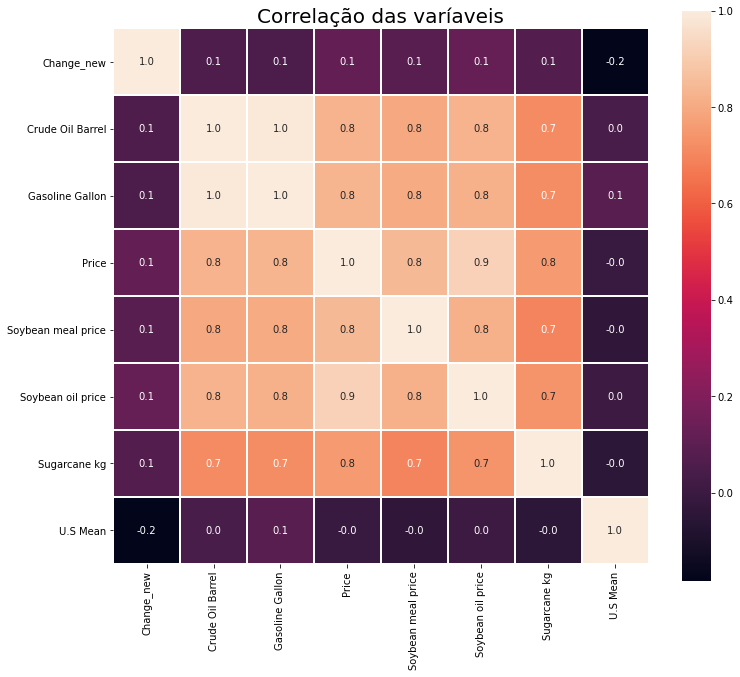

In [78]:
df2 = df[df.columns.difference(['Iowa', 'Minesota', 'Nebraska', 'Illinois', 'Indiana', 'Kansas', 'South Dakota', 'Missouri', 'Winsconsin','Ohio'])]
corr = df2.corr() 
f,ax = plt.subplots(figsize=(12, 10.5))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('Correlação das varíaveis', size=20);


É possível observar graças ao gráfico que a temperatura entre os estados não varia muito, podemos então retirar ela do gráfico para torná-lo mais limpo.
Outra coisa que podemos notar é a ausência da variavel month que é o único indicador que temos para a identificação de um ciclo ecônomico curto.  

In [79]:
df["Month_float"] = df.Month.astype(float)
df

,Month,Price,Change,Iowa,Minesota,Nebraska,Illinois,Indiana,Kansas,South Dakota,...,Soybean oil price,Soybean meal price,Sugarcane kg,Crude Oil Barrel,Gasoline Gallon,Date,Year,U.S Mean,Change_new,Month_float
0,08,185.50,-6.22 %,70.0,67.4,70.6,73.5,72.7,74.5,71.2,...,565.00,270.00,0.27,20.44,0.61,1996/08,1996,71.32,-6.22,8.0
1,09,145.39,-21.62 %,60.7,57.6,60.3,64.2,63.9,65.0,58.8,...,569.00,286.00,0.26,22.26,0.62,1996/09,1996,61.76,-21.62,9.0
2,10,127.85,-12.06 %,51.7,45.2,50.8,54.8,54.4,56.3,46.9,...,528.00,270.00,0.25,23.61,0.66,1996/10,1996,51.68,-12.06,10.0
3,11,117.74,-7.91 %,29.0,20.3,30.0,34.9,35.7,38.2,22.0,...,517.00,274.00,0.24,22.39,0.69,1996/11,1996,30.96,-7.91,11.0
4,12,117.69,-0.04 %,19.6,8.8,22.8,30.5,33.0,32.1,11.5,...,514.00,279.00,0.24,23.62,0.69,1996/12,1996,24.56,-0.04,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,03,245.17,-0.03 %,42.3,35.6,42.6,46.2,45.9,48.0,39.4,...,1284.81,483.90,0.34,63.83,1.99,2021/03,2021,43.16,-0.03,3.0
296,04,268.23,9.41 %,49.2,42.3,46.9,52.5,51.8,52.4,43.6,...,1400.75,464.20,0.36,62.95,1.99,2021/04,2021,48.92,9.41,4.0
297,05,305.31,13.82 %,58.9,55.2,57.9,61.1,59.6,61.8,55.1,...,1568.65,478.82,0.38,66.40,2.12,2021/05,2021,58.56,13.82,5.0
298,06,291.90,-4.39 %,73.4,69.9,72.8,74.1,72.7,75.8,72.3,...,1518.16,467.15,0.38,71.80,2.17,2021/06,2021,72.68,-4.39,6.0


É possível notar então que há grandes correlações entre o preço do milho e a variação de preços de commodities subistitutas de derivados desse

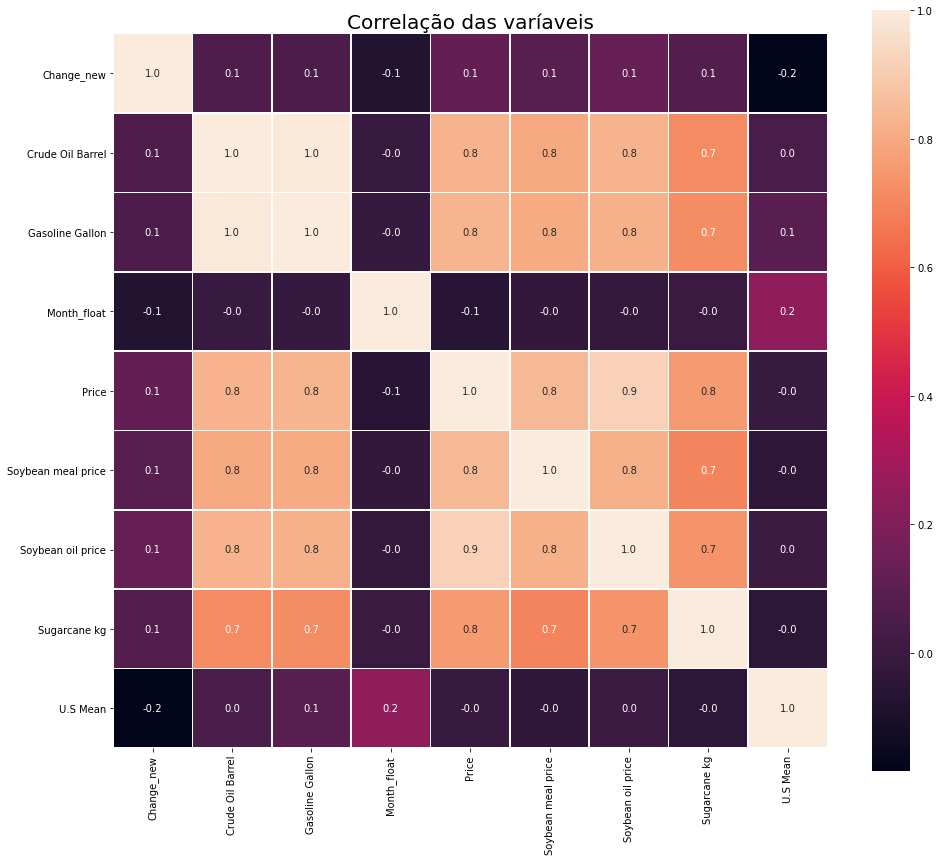

In [80]:
df2 = df[df.columns.difference(['Iowa', 'Minesota', 'Nebraska', 'Illinois', 'Indiana', 'Kansas', 'South Dakota', 'Missouri', 'Winsconsin','Ohio'])]
corr = df2.corr() 
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)

plt.title('Correlação das varíaveis', size=20);

Podemos realmente afirmar que não existe um ciclo econômico curto da commodity milho?

## Ciclo econômico curto

In [13]:
corn_month = df.pivot_table('Price', index='Month', columns='Year', aggfunc=sum)
abs_scaler = MaxAbsScaler()
abs_scaler.fit(corn_month)
abs_scaler.max_abs_
scaled_data = abs_scaler.transform(corn_month)
df_scaled = pd.DataFrame(scaled_data, columns=corn_month.columns)
df_scaled

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,0.927586,1.000000,1.000000,0.956232,1.000000,0.805852,0.954840,0.865318,0.895182,...,0.819216,0.980876,0.890718,0.972773,0.895258,0.982378,0.870177,0.854726,0.864265,0.767974
1,NaN,0.953527,0.988406,0.966646,0.975297,0.966579,0.795690,0.952231,0.925393,0.875558,...,0.839093,0.979614,0.941356,0.967149,0.887752,1.000000,0.912167,0.868977,0.848770,0.803249
2,NaN,1.000000,0.995641,0.987069,0.974272,0.948502,0.785088,0.949982,0.957678,0.928943,...,0.842786,1.000000,0.999865,0.970100,0.884750,0.976053,0.960411,0.852061,0.817125,0.803020
3,NaN,0.974922,0.933833,0.966030,0.975810,0.924750,0.763361,0.948723,1.000000,0.895461,...,0.822699,0.905740,1.000000,0.957962,0.914049,0.960580,0.980513,0.827814,0.739095,0.878550
4,NaN,0.930799,0.924941,0.949200,0.987597,0.883762,0.790871,0.966985,0.960449,0.887463,...,0.808527,0.956316,0.977244,0.925891,0.939345,0.973781,1.000000,0.876974,0.724003,1.000000
5,NaN,0.878135,0.908639,0.961104,0.864391,0.875565,0.824339,0.965545,0.923745,0.903088,...,0.802612,0.965603,0.910191,0.928285,1.000000,0.969729,0.921715,1.000000,0.744529,0.956077
6,NaN,0.831191,0.876210,0.861966,0.771525,0.964057,0.864640,0.870907,0.785393,1.000000,...,1.000000,0.904446,0.821775,1.000000,0.899316,0.967150,0.873639,0.970986,0.767470,0.905735
7,1.000000,0.884953,0.765931,0.879002,0.774703,0.978875,0.954354,0.905542,0.779401,0.945592,...,0.996817,0.772521,0.793398,0.905290,0.834770,0.911826,0.906639,0.838579,0.751321,NaN
8,0.783774,0.879624,0.752419,0.887418,0.824416,0.946716,1.000000,0.936308,0.733109,0.896112,...,0.963369,0.671143,0.733315,0.922160,0.825207,0.904396,0.864370,0.806131,0.835539,NaN
9,0.689218,0.943260,0.832796,0.880542,0.871566,0.909721,0.961100,0.948093,0.702547,0.948103,...,0.964540,0.652763,0.733585,0.954287,0.846500,0.912563,0.894857,0.856828,0.939528,NaN


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

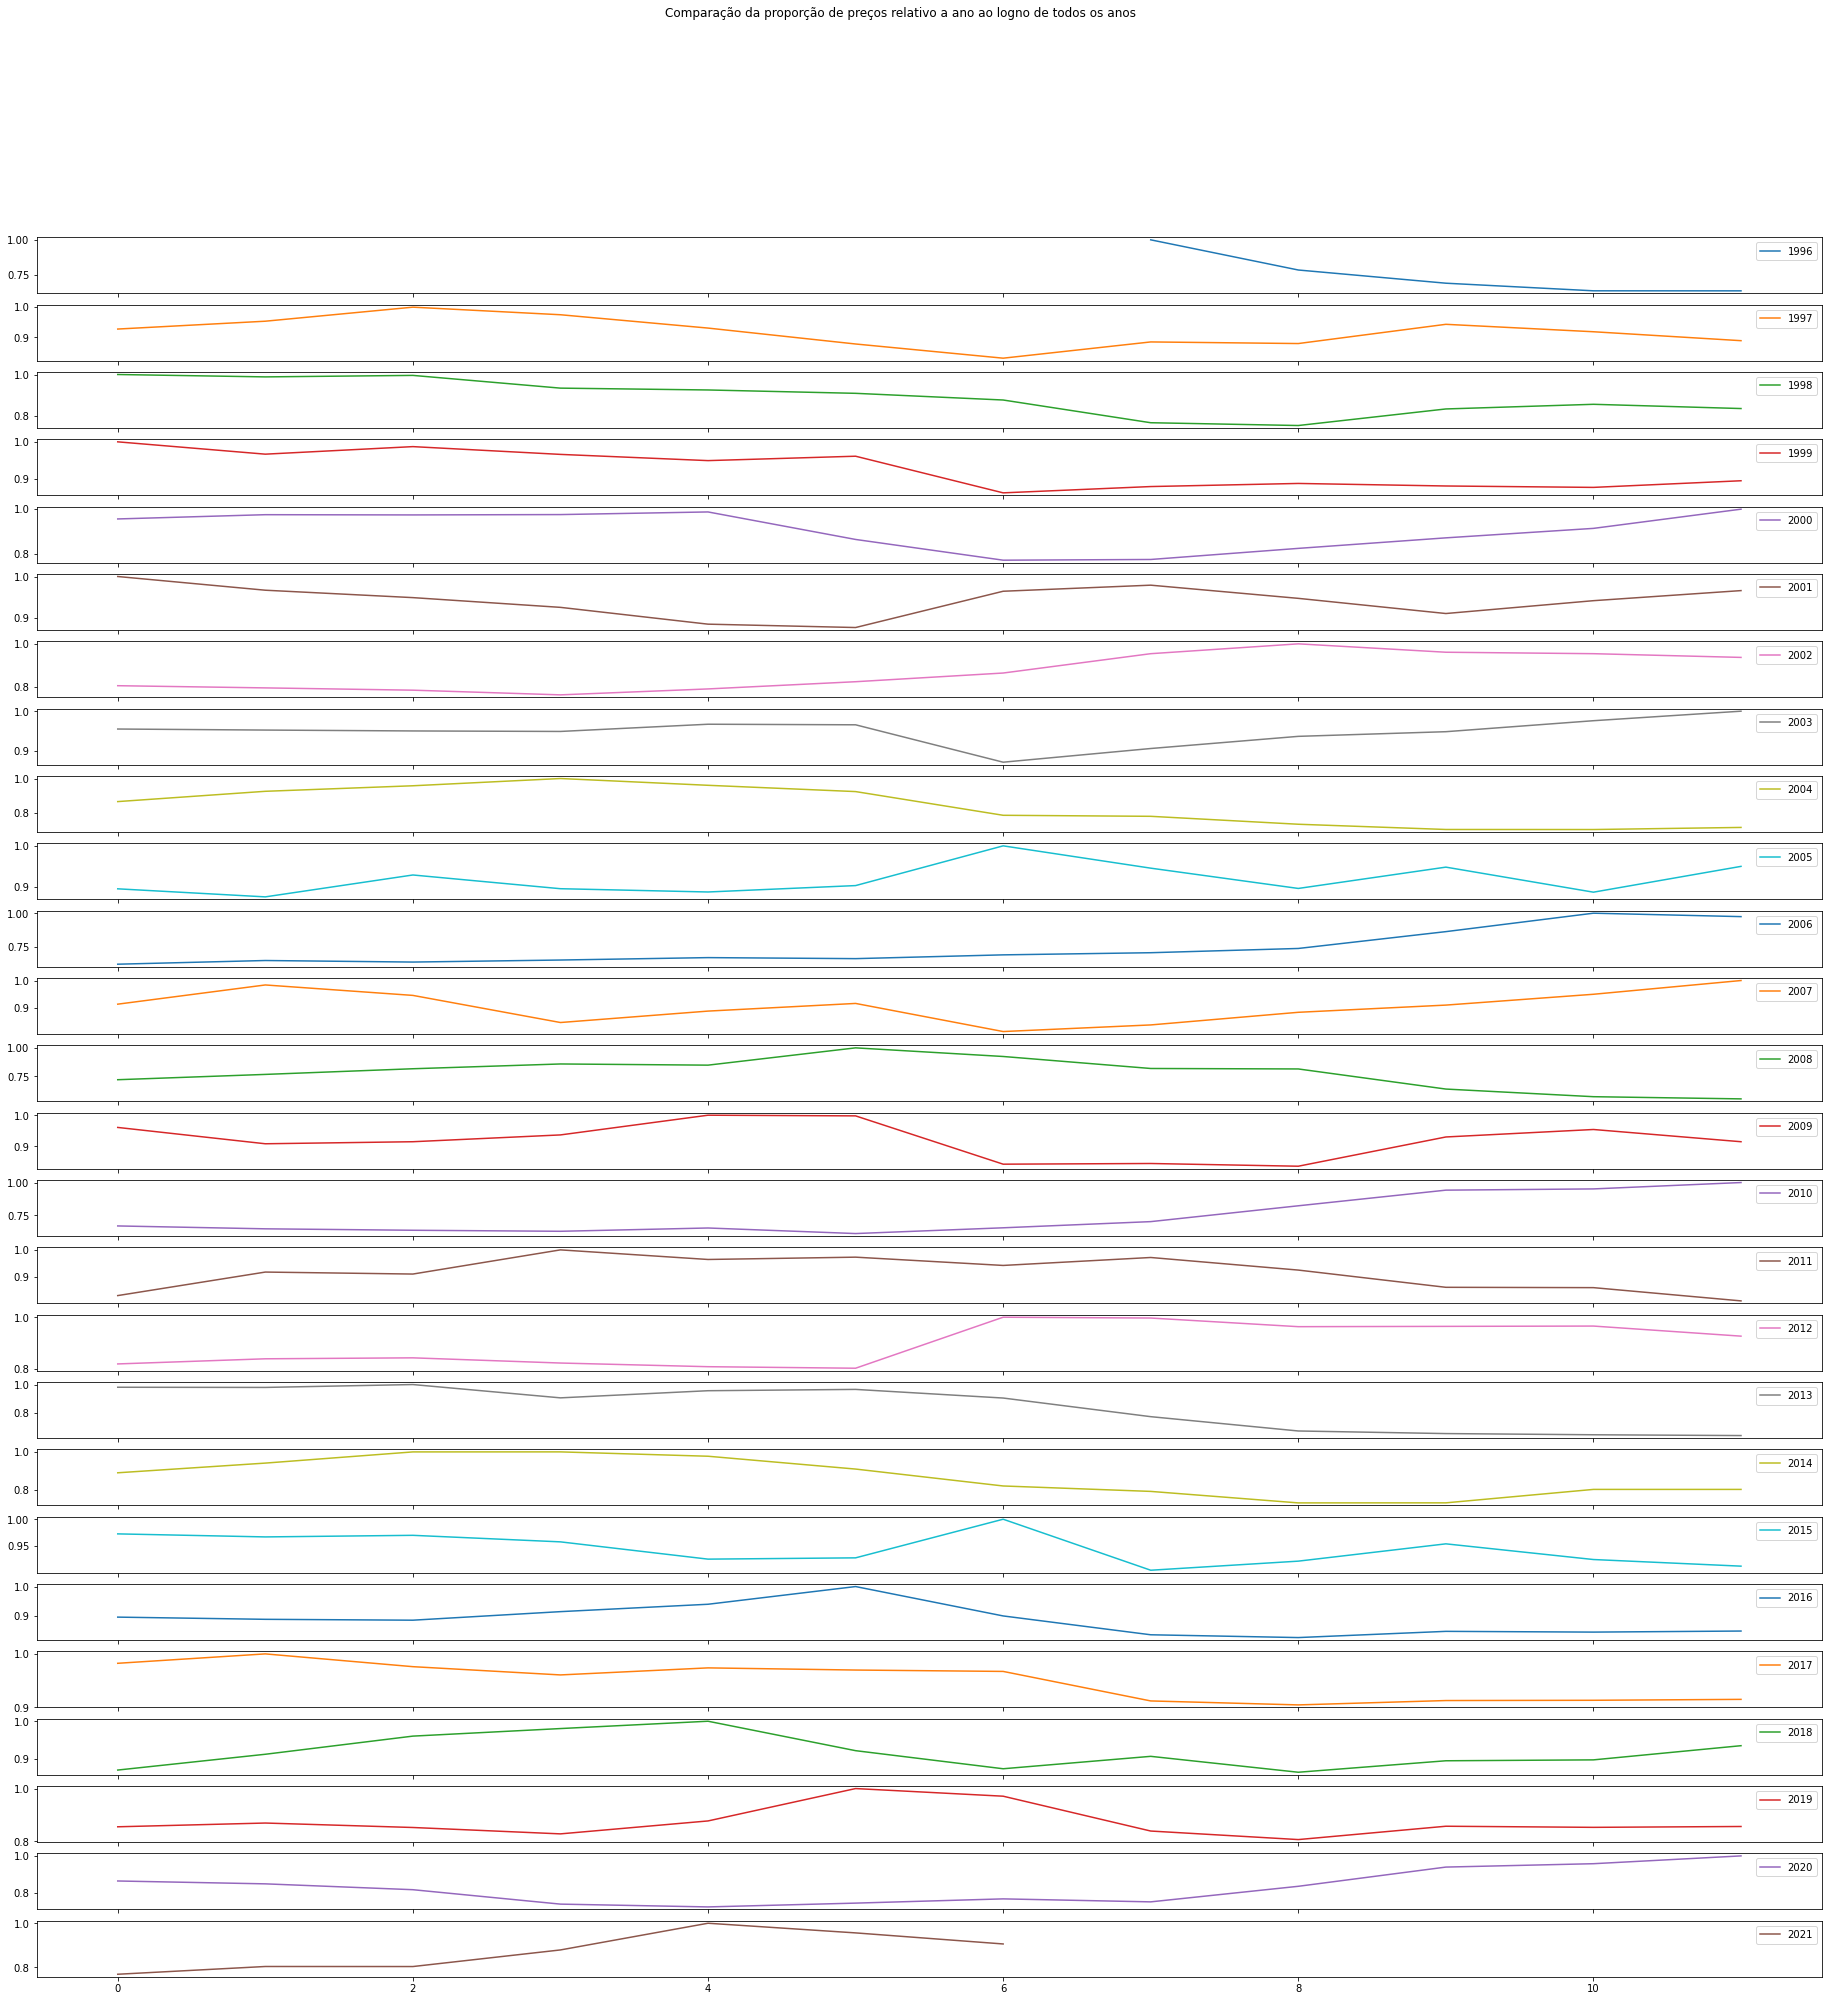

In [17]:
df_scaled.plot(subplots=True, figsize=(32, 32), grid=False, title="Comparação da proporção de preços relativo a ano ao logno de todos os anos")

<AxesSubplot:xlabel='Year'>

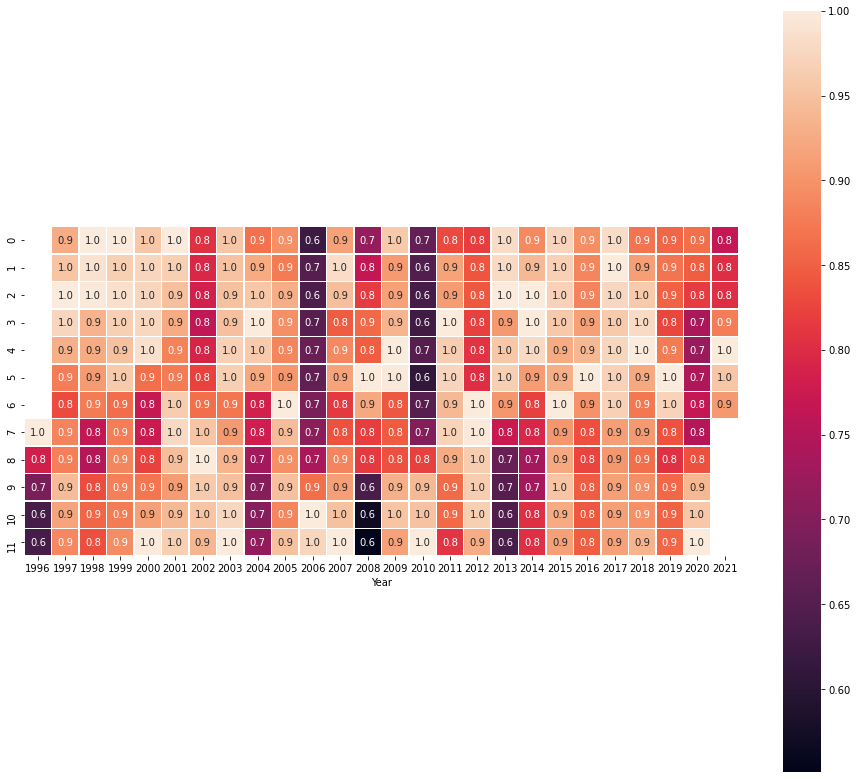

In [14]:
f,ax = plt.subplots(figsize=(16, 14))
sns.heatmap(df_scaled,cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, linewidths=.5, ax=ax)